Accuracy:  0.9264705882352942 

Recall Score:  0.875 

Precision Score:  0.9130434782608695 

F1 Score:  0.8936170212765957 

Specificity:  0.9545454545454546 

Confustion matrix:
 [[42  2]
 [ 3 21]] 



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

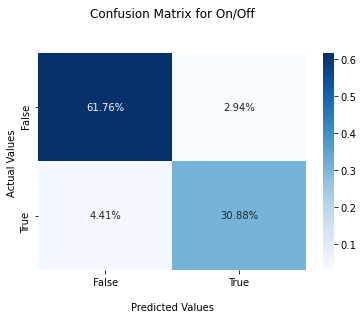

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#importing the dataset and splitting it into training and testing data
dataset = pd.read_csv('trainingDataset1week.csv')
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has on/off
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#training the decision tree classsifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

#predicting with the trained model
prediction1 = model1.predict(X_test)

#acccuracy score
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall score
recallScore = recall_score(y_test, prediction1)
print ("Recall Score: ", recallScore,"\n")

#precision score
precisionScore = precision_score(y_test, prediction1)
print ("Precision Score: ", precisionScore,"\n")

#f1 score
f1score = f1_score(y_test, prediction1)
print ("F1 Score: ", f1score,"\n")

#specificity
tn, fp, fn, tp = confusion_matrix(y_test, prediction1).ravel()
specificity = tn / (tn+fp)
print("Specificity: ", specificity,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)
print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix 
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for On/Off\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Decision Tree: AUROC = 0.967 



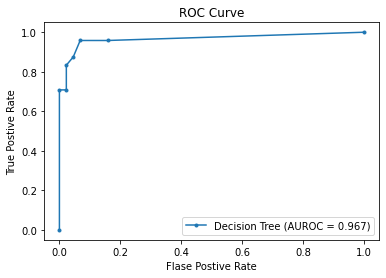

In [2]:
#AUROC score
dt_probs = model1.predict_proba(X_test)
dt_probs = dt_probs[:,1]
dt_auc = roc_auc_score(y_test, dt_probs)
print("Decision Tree: AUROC = %.3f \n" %(dt_auc))

#visualizing the ROC curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(dt_fpr, dt_tpr, marker=".", label="Decision Tree (AUROC = %0.3f)" % dt_auc)
plt.title("ROC Curve")
plt.xlabel("Flase Postive Rate")
plt.ylabel("True Postive Rate")
plt.legend()
plt.show()

Accuracy:  0.7794117647058824 

Recall Score:  0.7794117647058824 

Precision Score:  0.824331550802139 

F1 Score:  0.7897126038576107 

Confustion matrix:
 [[10  0  0  0  0  1  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  2  0 20  1  0  0]
 [ 0  0  2  0  9  2  1]
 [ 0  0  1  0  1  6  1]
 [ 0  0  0  0  0  3  3]] 



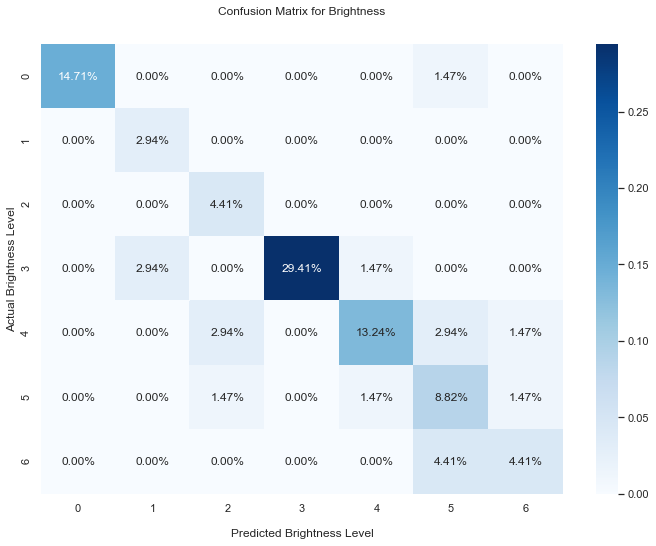

In [3]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Color temp (x*1000)Kelvin']) #only has brightness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#train the model
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

#predict with the model
prediction1 = model1.predict(X_test)

#accuracy 
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall
recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

#precision
precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

#f1score
f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)

print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Brightness\n\n');
ax.set_xlabel('\nPredicted Brightness Level')
ax.set_ylabel('Actual Brightness Level');

Accuracy:  0.6470588235294118 

Recall Score:  0.6470588235294118 

Precision Score:  0.7176120448179272 

F1 Score:  0.6592439529391327 

Confustion matrix:
 [[ 5  0  0  0  0  0  0]
 [ 1 20  0  0  1  1  0]
 [ 1  0  0  1  3  0  0]
 [ 0  0  1  5  2  0  0]
 [ 1  0  2  1  1  0  0]
 [ 1  0  2  2  0  1  0]
 [ 3  0  0  1  0  0 12]] 



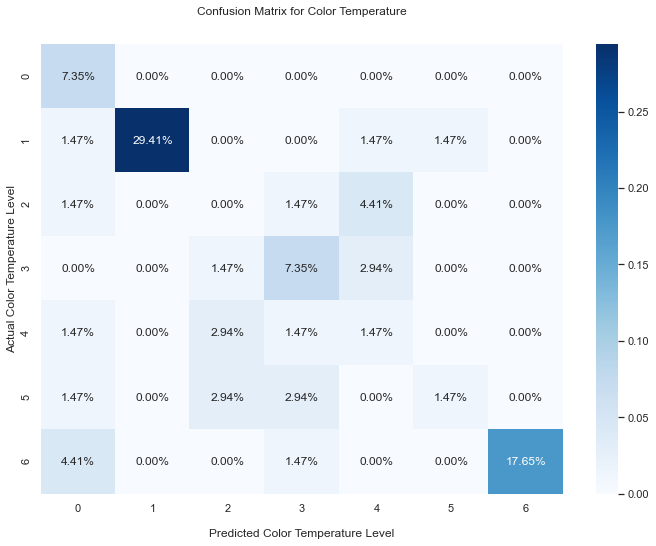

In [4]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Brightness (x*10)%']) #only has color temperature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#train the model
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

#predict with the model
prediction1 = model1.predict(X_test)

#accuracy
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall
recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

#precision
precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

#f1score
f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)

print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Color Temperature\n\n');
ax.set_xlabel('\nPredicted Color Temperature Level')
ax.set_ylabel('Actual Color Temperature Level');